<a href="https://colab.research.google.com/github/abhinav-exp/ELM_Implementaion/blob/main/ELM_ALL_ETH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EML** : *Moore-Penrose pseudoinverse vs JAYA vs TAO vs HHO*

---



## Common processes for all Moore-Penrose pseudoinverse, JAYA, TAO, HHO

###Importing All the neccessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###Data Collection

In [2]:
GitHubDataLink = 'https://raw.githubusercontent.com/abhinav-exp/Forecasting-CryptoCurrency-Prices/master/Datasets/'
InputFileLink = GitHubDataLink + 'DataETH2017.csv'
data1 = pd.read_csv(InputFileLink, header=0, index_col=0)
print(data1)

            ETH / Price, USD
Time                        
2017-06-18        350.534463
2017-06-19        357.681362
2017-06-20        349.288914
2017-06-21        320.277859
2017-06-22        320.145963
...                      ...
2019-08-03        221.835316
2019-08-04        222.788522
2019-08-05        232.299909
2019-08-06        225.729268
2019-08-07        226.042917

[781 rows x 1 columns]


### Normalisation of Data

In [3]:
data1min = data1.min()
data1max = data1.max()

normalize = lambda x: (x - data1min + 1)/(data1max - data1min + 2)
data2 = normalize(data1)
print(data2)

            ETH / Price, USD
Time                        
2017-06-18          0.206805
2017-06-19          0.212305
2017-06-20          0.205846
2017-06-21          0.183518
2017-06-22          0.183417
...                      ...
2019-08-03          0.107753
2019-08-04          0.108487
2019-08-05          0.115807
2019-08-06          0.110750
2019-08-07          0.110991

[781 rows x 1 columns]


In [4]:
denormalize = lambda x: (x)*np.float64(data1max - data1min + 2) + np.float64(data1min - 1)

### Sequence Convertion

In [5]:
def split_sequence(sequence, n_steps):
  X= list()
  for i in range(len(sequence) - n_steps):
    end_ix = i + n_steps
    seq_x= sequence.values[i:end_ix, 0]
    X.append(seq_x)
  return pd.DataFrame(X)

data3 = split_sequence(data2, 10)
print(data3.shape)
print(data3)

(771, 10)
            0         1         2         3         4         5         6  \
0    0.206805  0.212305  0.205846  0.183518  0.183417  0.187916  0.171582   
1    0.212305  0.205846  0.183518  0.183417  0.187916  0.171582  0.149627   
2    0.205846  0.183518  0.183417  0.187916  0.171582  0.149627  0.133304   
3    0.183518  0.183417  0.187916  0.171582  0.149627  0.133304  0.153351   
4    0.183417  0.187916  0.171582  0.149627  0.133304  0.153351  0.181593   
..        ...       ...       ...       ...       ...       ...       ...   
766  0.103915  0.106062  0.105852  0.096063  0.099358  0.099291  0.098667   
767  0.106062  0.105852  0.096063  0.099358  0.099291  0.098667  0.104869   
768  0.105852  0.096063  0.099358  0.099291  0.098667  0.104869  0.104303   
769  0.096063  0.099358  0.099291  0.098667  0.104869  0.104303  0.104545   
770  0.099358  0.099291  0.098667  0.104869  0.104303  0.104545  0.107753   

            7         8         9  
0    0.149627  0.133304  0.15

### Training and Testing Split

In [6]:
train_x = data3.iloc[:int(0.85*len(data3)), :-1]
train_y = data3.iloc[:int(0.85*len(data3)), -1:]
test_x = data3.iloc[int(0.85*len(data3)):, :-1]
test_y = data3.iloc[int(0.85*len(data3)):, -1:]
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(655, 9)
(655, 1)
(116, 9)
(116, 1)


## Moore-Penrose pseudoinverse

### Implementing the model

In [7]:
class ELM(object):
    def __init__(self, inputSize, outputSize, hiddenSize):
        self.inputSize = inputSize
        self.outputSize = outputSize
        self.hiddenSize = hiddenSize
        self.weight = np.matrix(np.random.uniform(-0.5, 0.5, (self.hiddenSize, self.inputSize)))
        self.bias = np.matrix(np.random.uniform(0, 1, (1, self.hiddenSize)))
        self.H = 0
        self.beta = 0

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-1 * x))

    def predict(self, X):
        X = np.matrix(X)
        y = self.sigmoid((X * self.weight.T) + self.bias) * self.beta
        return y

    def train(self, X, y):
        X = np.matrix(X)
        y = np.matrix(y)
        self.H = (X * self.weight.T) + self.bias
        self.H = self.sigmoid(self.H)
        H_moore_penrose = np.linalg.inv(self.H.T * self.H) * self.H.T
        self.beta = H_moore_penrose * y
        return self.H * self.beta

In [8]:
elm = ELM(9, 1, 10)
elm.train(train_x,train_y)
pred_y_MPP = elm.predict(test_x)

### Prediction

In [9]:
pred_y_MPP[:, 0]

matrix([[0.06446362],
        [0.06284188],
        [0.06563979],
        [0.05996822],
        [0.06246532],
        [0.06519825],
        [0.07144264],
        [0.07125112],
        [0.07032618],
        [0.06853075],
        [0.06938787],
        [0.06967058],
        [0.0642041 ],
        [0.05274368],
        [0.05211489],
        [0.05637692],
        [0.05485252],
        [0.0516007 ],
        [0.05763511],
        [0.06034661],
        [0.05990064],
        [0.0629253 ],
        [0.06326735],
        [0.06211759],
        [0.0686468 ],
        [0.07010941],
        [0.0684057 ],
        [0.06703527],
        [0.07071998],
        [0.09205824],
        [0.08492344],
        [0.08741838],
        [0.10498141],
        [0.13600102],
        [0.14799707],
        [0.12618784],
        [0.11871481],
        [0.14298324],
        [0.14182549],
        [0.13477398],
        [0.12083783],
        [0.12769232],
        [0.13201385],
        [0.13136588],
        [0.14350881],
        [0

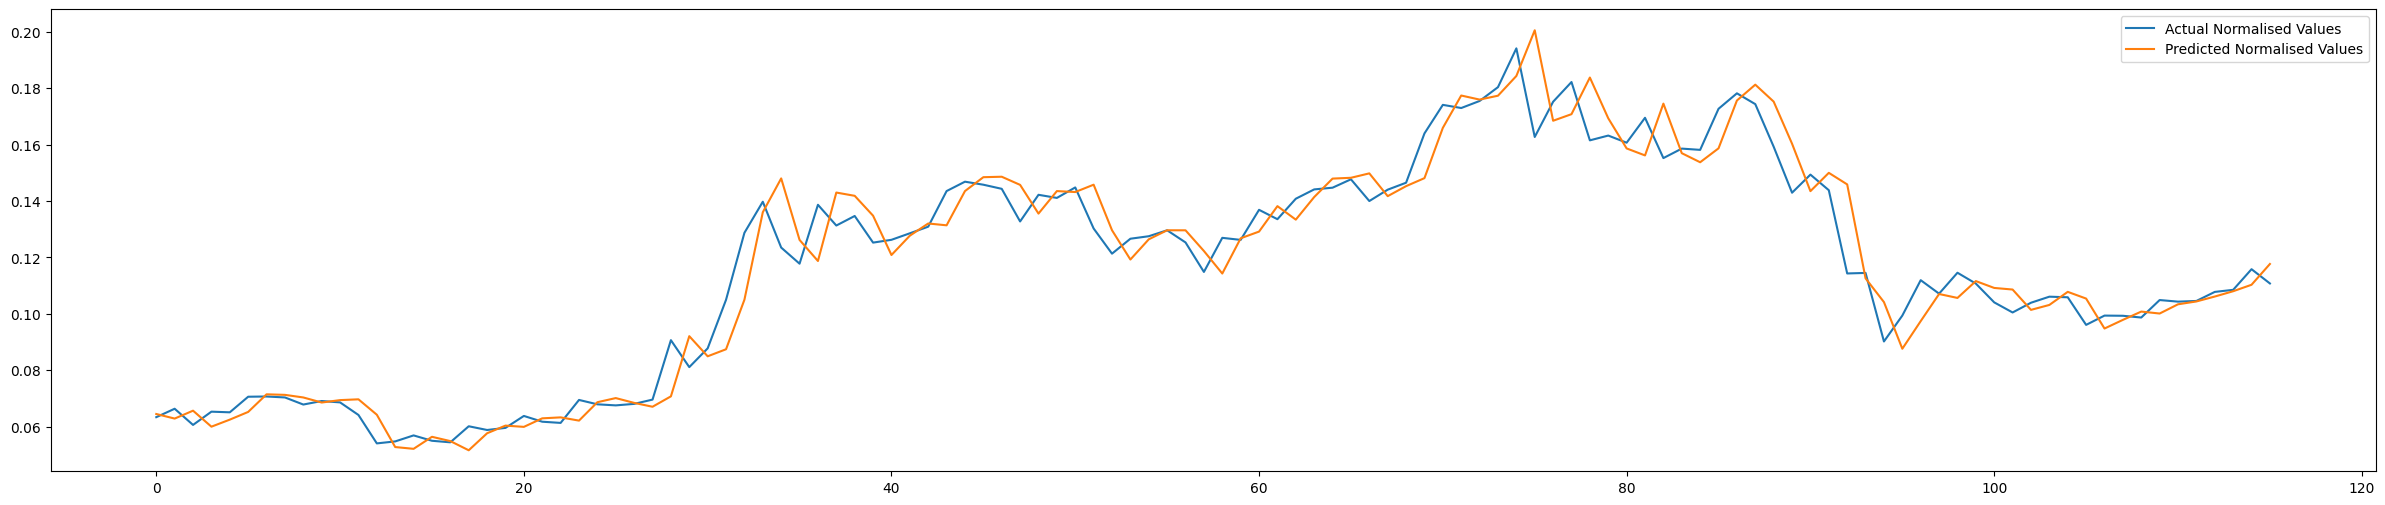

In [10]:
plt.figure(figsize=(30, 6))
plt.plot(test_y.reset_index()[9])
plt.plot(pred_y_MPP)
plt.legend(["Actual Normalised Values", "Predicted Normalised Values"])
plt.show()

In [11]:
denormalized_preds_MPP = denormalize(pred_y_MPP)
# print(denormalized_preds)
preds1_MPP = pd.DataFrame(denormalized_preds_MPP)
preds1_MPP['DATE'] = data1.index[-1*len(preds1_MPP):]
preds1_MPP = preds1_MPP.set_index('DATE')
print(preds1_MPP)

                     0
DATE                  
2019-04-14  165.588701
2019-04-15  163.481553
2019-04-16  167.116908
2019-04-17  159.747761
2019-04-18  162.992279
...                ...
2019-08-03  217.441241
2019-08-04  219.701868
2019-08-05  222.150068
2019-08-06  225.126356
2019-08-07  234.705556

[116 rows x 1 columns]


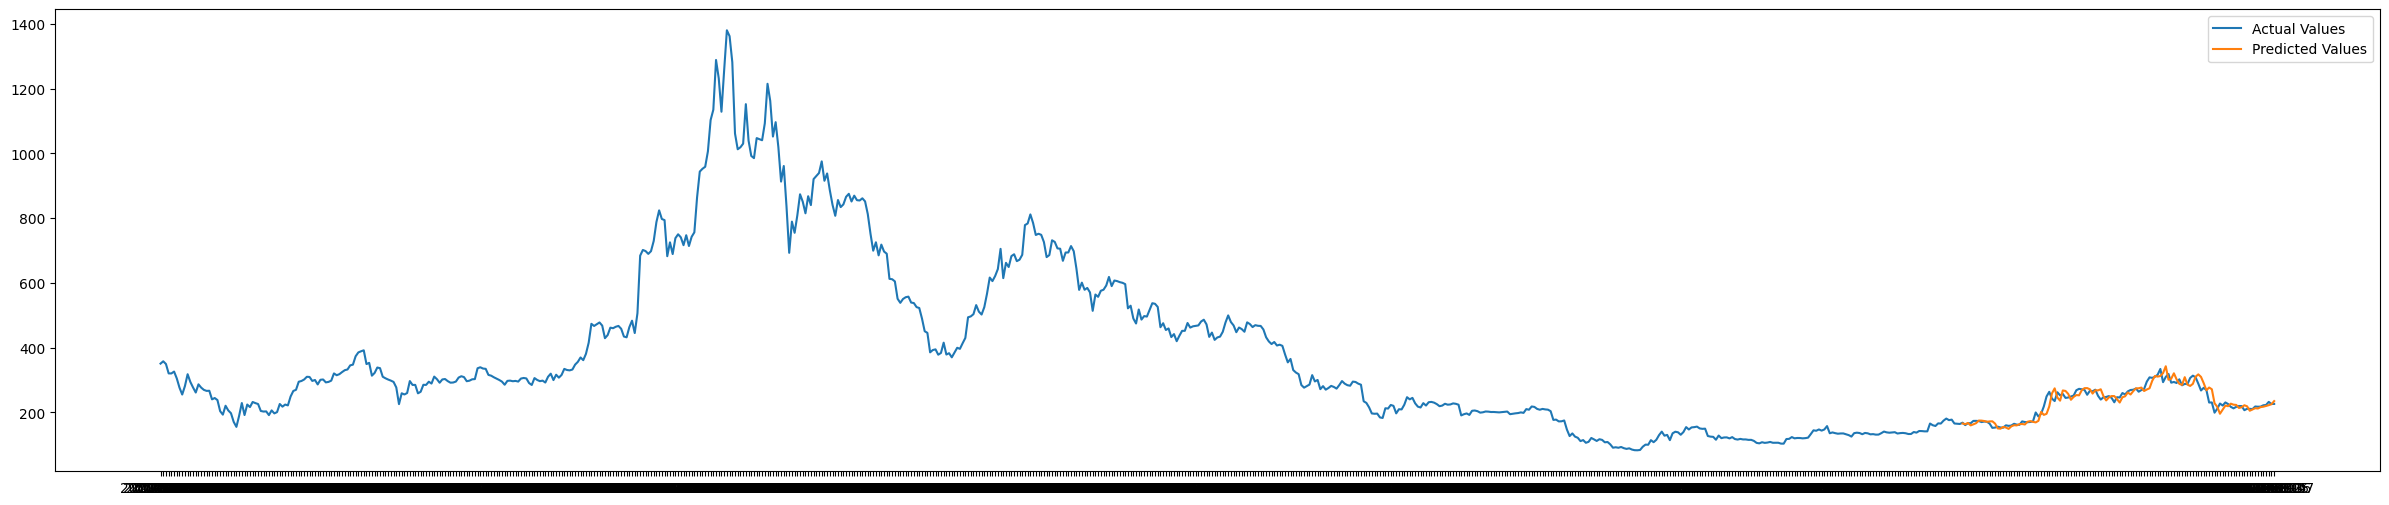

In [12]:
plt.figure(figsize=(30, 6))
plt.plot(data1)
plt.plot(preds1_MPP)
plt.legend(["Actual Values", "Predicted Values"])
plt.show()

### Errors

In [13]:
mse_MPP = np.mean((np.array(preds1_MPP[0]) - np.array(data1.iloc[-1*(len(preds1_MPP)):, 0]))**2)
print("mse  "+ str(mse_MPP))
print("rmse "+ str(np.sqrt(mse_MPP)))

mse  276.77599131487517
rmse 16.63658592725308


In [14]:
np.array(test_y - pred_y_MPP)[:, 0]

array([-1.12370175e-03,  3.48764406e-03, -5.04838211e-03,  5.32171378e-03,
        2.59510755e-03,  5.38956342e-03, -7.72598298e-04, -9.17735857e-04,
       -2.50932903e-03,  5.32769892e-04, -8.07683501e-04, -5.55067109e-03,
       -1.01638210e-02,  2.00114971e-03,  4.75859972e-03, -1.40818717e-03,
       -4.27642949e-04,  8.51432484e-03,  1.15949535e-03, -8.06418170e-04,
        3.87551074e-03, -1.19498965e-03, -1.96162558e-03,  7.33321838e-03,
       -7.49510090e-04, -2.59028154e-03, -3.54328960e-04,  2.53344290e-03,
        1.99249977e-02, -1.09740047e-02,  2.81130704e-03,  1.75482231e-02,
        2.37258882e-02,  3.72673372e-03, -2.45214845e-02, -8.42489602e-03,
        1.99305070e-02, -1.16930455e-02, -7.14832934e-03, -9.53845252e-03,
        5.39043504e-03,  8.43982530e-04, -1.13076439e-03,  1.21437715e-02,
        3.32720874e-03, -2.66674270e-03, -4.28667356e-03, -1.29711823e-02,
        6.65830845e-03, -2.42054007e-03,  1.62950091e-03, -1.55248543e-02,
       -8.30492976e-03,  

In [15]:
err_test_MPP = np.array(test_y - pred_y_MPP)[:, 0]
mse_test_MPP = np.mean(err_test_MPP ** 2)
rmse_test_MPP = np.sqrt(mse_test_MPP)
mae_test_MPP = np.mean(np.abs(err_test_MPP))
mape_test_MPP = np.mean(np.abs(err_test_MPP) / np.array(test_y)[:, 0])
MPPN = pd.DataFrame([[mse_test_MPP, rmse_test_MPP, mae_test_MPP, mape_test_MPP]], columns = ["mse", "rmse", "mae", "mape"], index = ['MPPN'])
MPPN

,mse,rmse,mae,mape
MPPN,0.00009,0.009507,0.006656,0.057398


## Jaya Optimisation

### Implementing the model

In [53]:
class JAYA_ELM():
  def __init__(self, p_size):
    self.p_size = p_size
    self.no_hidden_nodes = 10
    self.weight = np.random.uniform(-0.5, 0.5, (self.p_size, 9, self.no_hidden_nodes))
    self.bias = np.random.uniform(0, 1, (self.p_size, self.no_hidden_nodes))
    self.beta = np.random.uniform(-0.5, 0.5, (self.p_size, self.no_hidden_nodes, 1))
    self.train_px = np.tile(np.expand_dims(train_x, axis = 0), (p_size, 1, 1))
    self.train_py = np.tile(np.expand_dims(train_y, axis = 0), (p_size, 1, 1))
    preds = self.forward_function(self.weight, self.bias, self.beta, self.train_px)
    error = (preds - self.train_py) ** 2
    self.mse = np.mean(error, axis = 1)
    self.best = np.argmin(self.mse)
    self.worst = np.argmax(self.mse)
    self.best_error_graph = np.array([np.sum(self.mse)])

  def sigmoid(self, x):
    return 1 / (1 + np.exp(-1 * x))

  def forward_function(self, weight, bias, beta, X):
    # print("x", X.shape)
    # print("w", weight.shape)
    a = np.matmul(X, weight)
    # print("h", a.shape)
    # print("b", bias.shape)
    # print(len(bias.shape))
    c = np.expand_dims(bias, axis = len(bias.shape) - 1)
    # print("c", c.shape)
    b = a + c
    return self.sigmoid(np.matmul(b, beta))

  def optimise(self, gen):
    for i in range(gen):
      r0 = np.random.random((self.p_size, self.no_hidden_nodes, 1))
      r1 = np.random.random((self.p_size, self.no_hidden_nodes, 1))
      new_beta = self.beta
      new_beta += r0 * (self.beta[self.best] - self.beta)
      new_beta -= r1 * (self.beta[self.worst] - self.beta)
      new_pred = self.forward_function(self.weight, self.bias, new_beta, self.train_px)
      new_error = (new_pred - self.train_py) ** 2
      new_mse = np.mean(new_error, axis = 1)
      cond = new_mse < self.mse
      self.beta = np.where(np.expand_dims(cond, axis = 1), new_beta, self.beta)
      self.mse = np.where(cond, new_mse, self.mse)
      self.best = np.argmin(self.mse)
      self.worst = np.argmax(self.mse)
      self.best_error_graph = np.append(self.best_error_graph, np.array([np.sum(self.mse)]))



### Convergence Curve

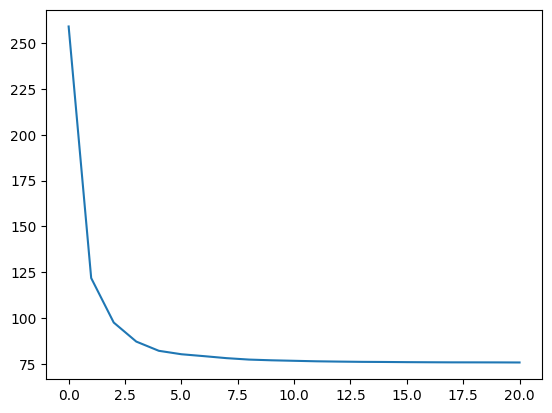

In [54]:
optimiser = JAYA_ELM(2000)
optimiser.optimise(20)
ec_Jaya = optimiser.best_error_graph
plt.plot(ec_Jaya)
preds_train_Jaya = optimiser.forward_function(optimiser.weight[optimiser.best], optimiser.bias[optimiser.best], optimiser.beta[optimiser.best],  train_x)


In [55]:
print(preds_train_Jaya.shape)
# print(np.array(train_y)[:, 0])
# print(np.array(preds_train)[:, 0])
error_train_Jaya = (np.array(train_y)[:, 0] - np.array(preds_train_Jaya)[:, 0])
# print(error_train)
print(np.mean((error_train_Jaya) ** 2))

(655, 1)
0.002466829079599179


### Prediction

In [56]:
preds_Jaya = optimiser.forward_function(optimiser.weight[optimiser.best], optimiser.bias[optimiser.best], optimiser.beta[optimiser.best], test_x)
print(preds_Jaya.shape)
error_test_Jaya = (np.array(test_y)[:, 0] - np.array(preds_Jaya)[:, 0])
print(np.mean(error_test_Jaya ** 2))

(116, 1)
0.001360610296780156


In [57]:
np.array(preds_Jaya)[:, 0]

array([0.1211522 , 0.12132983, 0.12054921, 0.11987807, 0.11874224,
       0.12046967, 0.12050728, 0.12174488, 0.12143483, 0.1219413 ,
       0.12189505, 0.12239648, 0.12118641, 0.11886767, 0.11720333,
       0.11780481, 0.11649299, 0.11507927, 0.11587231, 0.11710365,
       0.11638495, 0.117495  , 0.11838172, 0.11789349, 0.11928739,
       0.1209713 , 0.12012983, 0.12081234, 0.1217172 , 0.12518351,
       0.12786526, 0.12588897, 0.13298676, 0.14092801, 0.14805407,
       0.14805251, 0.14783668, 0.15537118, 0.15918862, 0.1540117 ,
       0.15509925, 0.15444939, 0.156635  , 0.15529815, 0.15769643,
       0.16135625, 0.16204725, 0.16321567, 0.16247845, 0.16199559,
       0.16451   , 0.16248303, 0.16118309, 0.15595364, 0.15683707,
       0.15689108, 0.15472639, 0.15355101, 0.15133244, 0.15191212,
       0.15476095, 0.15384807, 0.15633478, 0.15680122, 0.16176943,
       0.16219974, 0.16383538, 0.16391883, 0.16340118, 0.16589199,
       0.16863868, 0.17512383, 0.17671767, 0.17945927, 0.18453

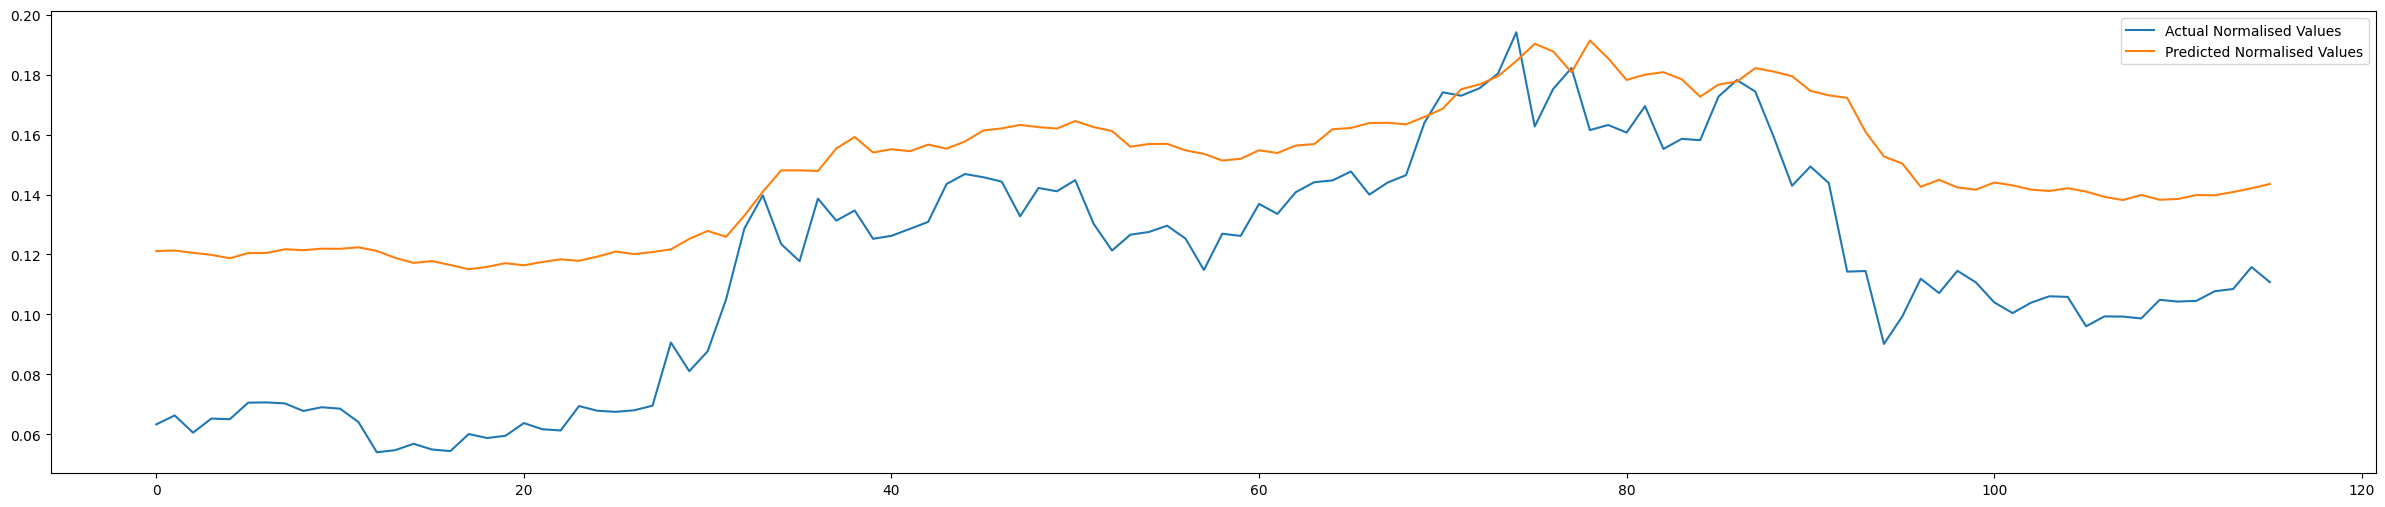

In [58]:
plt.figure(figsize=(30, 6))
plt.plot(test_y.reset_index()[9])
plt.plot(np.array(preds_Jaya)[:, 0])
plt.legend(["Actual Normalised Values", "Predicted Normalised Values"])
plt.show()

In [59]:
denormalized_preds_Jaya = denormalize(preds_Jaya)
# print(denormalized_preds)
preds1_Jaya = pd.DataFrame(denormalized_preds_Jaya)
preds1_Jaya['DATE'] = data1.index[-1*len(preds1_Jaya):]
preds1_Jaya = preds1_Jaya.set_index('DATE')
print(preds1_Jaya)

                     0
DATE                  
2019-04-14  239.244977
2019-04-15  239.475784
2019-04-16  238.461506
2019-04-17  237.589484
2019-04-18  236.113680
...                ...
2019-08-03  263.494401
2019-08-04  263.416860
2019-08-05  264.814356
2019-08-06  266.425299
2019-08-07  268.308970

[116 rows x 1 columns]


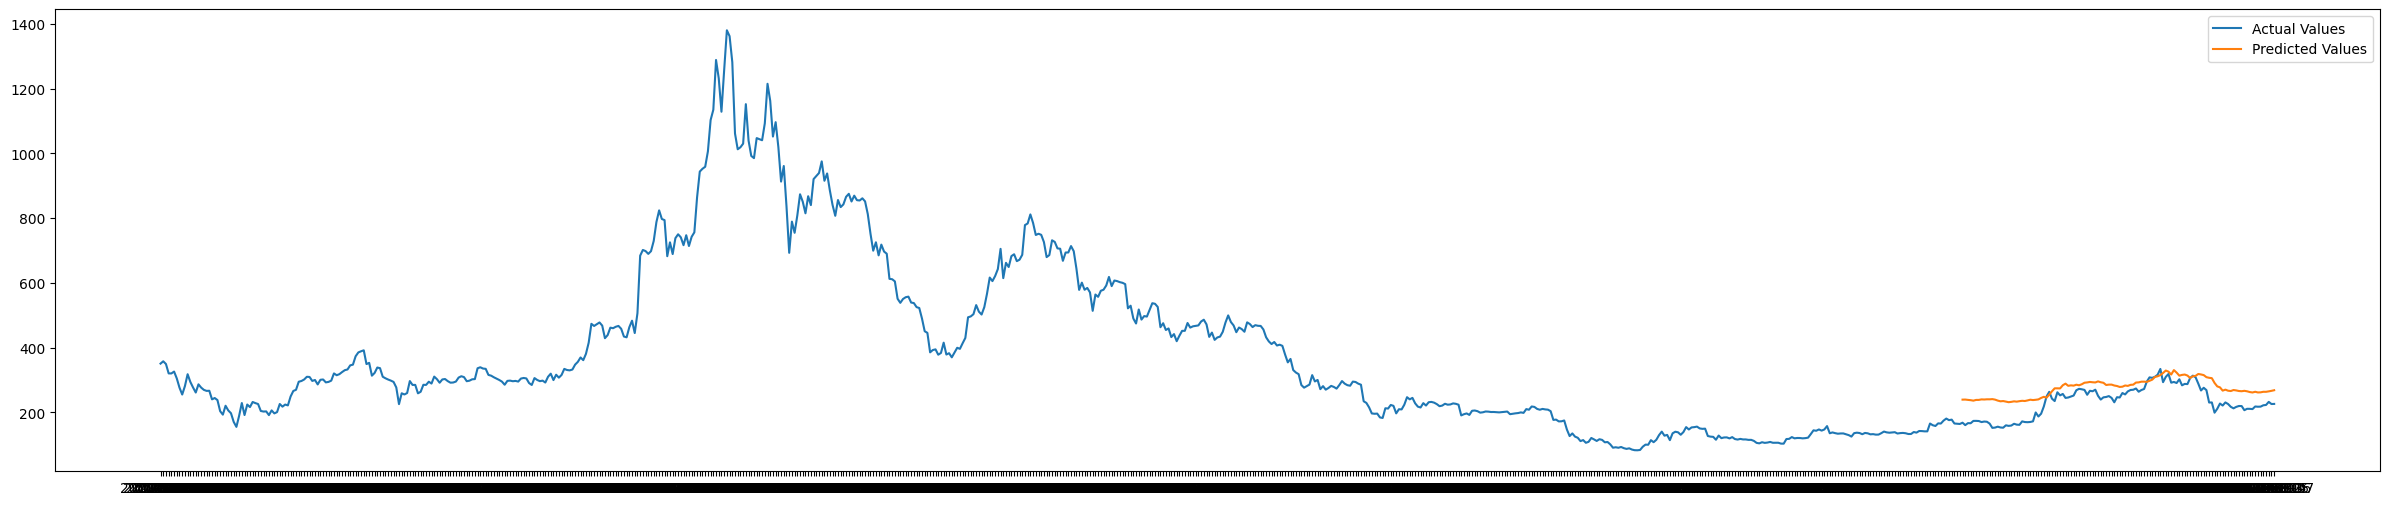

In [60]:
plt.figure(figsize=(30, 6))
plt.plot(data1)
plt.plot(preds1_Jaya)
plt.legend(["Actual Values", "Predicted Values"])
plt.show()

### Errors

In [61]:
mse_Jaya = np.mean((np.array(preds1_Jaya[0]) - np.array(data1.iloc[-1*(len(preds1_Jaya)):, 0]))**2)
print("mse  "+ str(mse_Jaya))
print("rmse "+ str(np.sqrt(mse_Jaya)))

mse  2311.5185106281297
rmse 48.07825403057114


In [62]:
(np.array(test_y) - np.array(preds_Jaya))[:, 0]

array([-0.05781227, -0.0550003 , -0.0599578 , -0.05458813, -0.05368181,
       -0.04988185, -0.04983724, -0.05141149, -0.05361798, -0.05287777,
       -0.05331487, -0.05827657, -0.06714614, -0.06412284, -0.06032984,
       -0.06283608, -0.06206811, -0.05496425, -0.05707771, -0.05756345,
       -0.0526088 , -0.05576469, -0.05707599, -0.04844269, -0.0513901 ,
       -0.05345217, -0.05207846, -0.05124363, -0.03107222, -0.04409927,
       -0.04013052, -0.02092236, -0.00427946, -0.00120025, -0.02457848,
       -0.03028956, -0.00919136, -0.02408099, -0.02451146, -0.02877617,
       -0.02887098, -0.02591309, -0.02575191, -0.0117885 , -0.01086041,
       -0.01559221, -0.0177422 , -0.03048104, -0.0202929 , -0.02091352,
       -0.01971297, -0.03223929, -0.03986768, -0.0293427 , -0.02934016,
       -0.02728755, -0.0294324 , -0.03871399, -0.02440693, -0.02571423,
       -0.01789919, -0.0203114 , -0.01554265, -0.01270445, -0.01706362,
       -0.01451884, -0.02385997, -0.01991469, -0.01693369, -0.00

In [63]:
err_test_Jaya = (np.array(test_y) - np.array(preds_Jaya))[:, 0]
mse_test_Jaya = np.mean(err_test_Jaya ** 2)
rmse_test_Jaya = np.sqrt(mse_test_Jaya)
mae_test_Jaya = np.mean(np.abs(err_test_Jaya))
mape_test_Jaya = np.mean(np.abs(err_test_Jaya) / np.array(test_y)[:, 0])
EJYN = pd.DataFrame([[mse_test_Jaya, rmse_test_Jaya, mae_test_Jaya, mape_test_Jaya]], columns = ["mse", "rmse", "mae", "mape"], index = ['Jaya'])
EJYN

,mse,rmse,mae,mape
Jaya,0.001361,0.036886,0.032416,0.374766


## TAO (Teamwork Optimisation)

### Implementing the model

In [27]:
class TAO_ELM():
  def __init__(self, p_size):
    self.p_size = p_size
    self.no_hidden_nodes = 10
    self.weight = np.random.uniform(-0.5, 0.5, (self.p_size, 9, self.no_hidden_nodes))
    self.bias = np.random.uniform(0, 1, (self.p_size, self.no_hidden_nodes))
    self.beta = np.random.uniform(-0.5, 0.5, (self.p_size, self.no_hidden_nodes, 1))
    self.train_px = np.tile(np.expand_dims(train_x, axis = 0), (p_size, 1, 1))
    self.train_py = np.tile(np.expand_dims(train_y, axis = 0), (p_size, 1, 1))
    preds = self.forward_function(self.weight, self.bias, self.beta, self.train_px)
    error = (preds - self.train_py) ** 2
    self.mse = np.mean(error, axis = 1)
    self.supervisor = np.argmin(self.mse)
    self.best_error_graph = np.array([np.min(self.mse)])

  def sigmoid(self, x):
    return 1 / (1 + np.exp(-1 * x))

  def forward_function(self, weight, bias, beta, X):
    a = np.matmul(X, weight)
    c = np.expand_dims(bias, axis = len(bias.shape) - 1)
    b = a + c
    return self.sigmoid(np.matmul(b, beta))

  def forward_propagation(self, weight, bias, new_beta):
    preds = self.forward_function(weight, bias, new_beta, self.train_px)
    error = (preds - self.train_py) ** 2
    new_obj = np.mean(error, axis = 1)
    cond = (new_obj < self.mse)
    self.beta = np.where(np.expand_dims(cond, axis = 1), new_beta, self.beta)
    self.mse = np.where(cond, new_obj, self.mse)
    self.supervisor = np.argmin(self.mse)

  def optimise(self, gen):
    for i in range(gen):

      # supervisor guidance
      r = np.random.random((self.p_size, self.no_hidden_nodes, 1))
      I = np.round_(r)
      S = self.beta[self.supervisor]
      new_beta = self.beta + r * (S - I * self.beta)
      self.forward_propagation(self.weight, self.bias, new_beta)

      #information sharing
      cmp_better = self.mse.T >= self.mse
      cmp_better = np.expand_dims(cmp_better, axis = [2, 3])
      cnt_better = cmp_better.sum(axis = 1)

      SB = np.tile(np.expand_dims(self.beta, axis = 0), (self.p_size, 1, 1, 1))
      # print("SB", SB.shape)
      SB = np.where(cmp_better, SB, np.zeros(SB.shape))
      SB = SB.sum(axis = 1)/cnt_better

      preds = self.forward_function(self.weight, self.bias, SB, self.train_px)
      error = (preds - self.train_py) ** 2
      S_obj = np.mean(error, axis = 1)
      SGN = np.expand_dims(np.sign(self.mse - S_obj), axis = 2)

      r = np.random.random((self.p_size, self.no_hidden_nodes, 1))
      I = np.round_(r)
      beta = self.beta + r * (SB - I * self.beta) * SGN
      self.forward_propagation(self.weight, self.bias, beta)

      #individual activity
      r = np.random.random((self.p_size, self.no_hidden_nodes, 1))
      new_beta = self.beta + (-1*0.01 + r * 0.02) * self.beta
      self.forward_propagation(self.weight, self.bias, new_beta)

      # best error curve
      self.best_error_graph = np.append(self.best_error_graph, np.array([np.min(self.mse)]))



### Convergence Curve

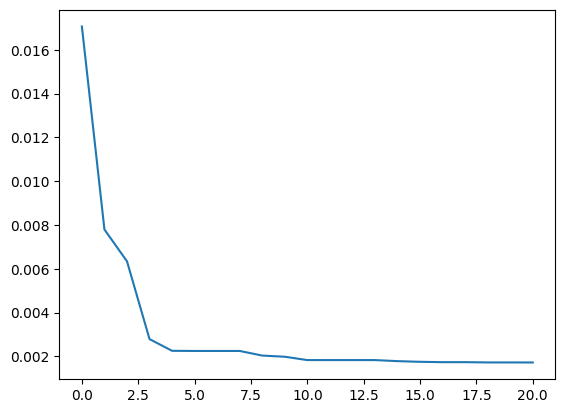

In [28]:
optimiser = TAO_ELM(2000)
optimiser.optimise(20)
ec_Tao = optimiser.best_error_graph
plt.plot(ec_Tao)
preds_train_Tao = optimiser.forward_function(optimiser.weight[optimiser.supervisor], optimiser.bias[optimiser.supervisor], optimiser.beta[optimiser.supervisor],  train_x)

In [29]:
print(preds_train_Tao.shape)
# print(np.array(train_y)[:, 0])
# print(np.array(preds_train)[:, 0])
error_train_Tao = (np.array(train_y)[:, 0] - np.array(preds_train_Tao)[:, 0])
# print(error_train)
print(np.mean((error_train_Tao) ** 2))

(655, 1)
0.001724964435810657


### Prediction

In [30]:
preds_Tao = optimiser.forward_function(optimiser.weight[optimiser.supervisor], optimiser.bias[optimiser.supervisor], optimiser.beta[optimiser.supervisor], test_x)
print(preds_Tao.shape)
error_test_Tao = (np.array(test_y)[:, 0] - np.array(preds_Tao)[:, 0])
print(np.mean(error_test_Tao ** 2))

(116, 1)
0.00031675238473677424


In [31]:
np.array(preds_Tao)[:, 0]

array([0.09153272, 0.09091715, 0.08993056, 0.08971282, 0.0894358 ,
       0.09124393, 0.09300007, 0.09525422, 0.09418011, 0.0945349 ,
       0.09368069, 0.09390956, 0.09172756, 0.08768714, 0.08549553,
       0.08609599, 0.08572385, 0.08571232, 0.08701437, 0.08881339,
       0.0896636 , 0.09100526, 0.0908061 , 0.09115864, 0.09300948,
       0.09367347, 0.0939945 , 0.09383989, 0.09365666, 0.10193002,
       0.1024384 , 0.1031417 , 0.11193674, 0.12322112, 0.13903334,
       0.13239577, 0.12668095, 0.13293722, 0.13247089, 0.13060013,
       0.1244804 , 0.12090938, 0.12675224, 0.12385142, 0.13101787,
       0.13519609, 0.1376151 , 0.13833806, 0.13148546, 0.13261771,
       0.13253212, 0.13205483, 0.12862726, 0.11927385, 0.12145039,
       0.12064171, 0.1227353 , 0.12094582, 0.11627464, 0.12085956,
       0.12265383, 0.12680302, 0.12951742, 0.13018869, 0.13773123,
       0.13659513, 0.13970326, 0.13462264, 0.13458103, 0.13608276,
       0.14293687, 0.15464286, 0.1565336 , 0.16090877, 0.16304

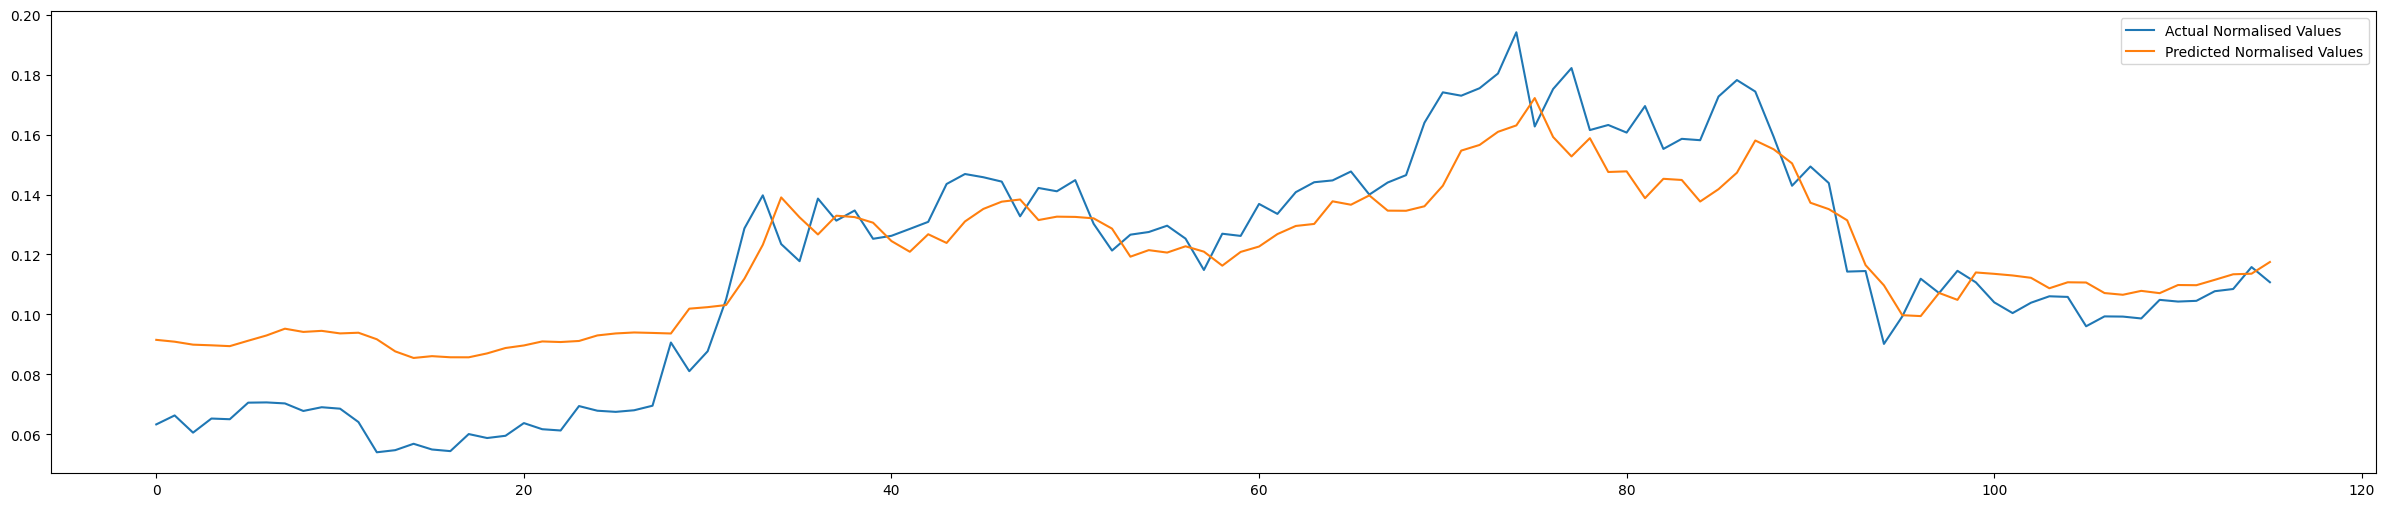

In [32]:
plt.figure(figsize=(30, 6))
plt.plot(test_y.reset_index()[9])
plt.plot(np.array(preds_Tao)[:, 0])
plt.legend(["Actual Normalised Values", "Predicted Normalised Values"])
plt.show()

In [33]:
denormalized_preds_Tao = denormalize(preds_Tao)
# print(denormalized_preds)
preds1_Tao = pd.DataFrame(denormalized_preds_Tao)
preds1_Tao['DATE'] = data1.index[-1*len(preds1_Tao):]
preds1_Tao = preds1_Tao.set_index('DATE')
print(preds1_Tao)

                     0
DATE                  
2019-04-14  200.759972
2019-04-15  199.960149
2019-04-16  198.678255
2019-04-17  198.395349
2019-04-18  198.035413
...                ...
2019-08-03  224.441994
2019-08-04  226.773451
2019-08-05  229.169702
2019-08-06  229.425225
2019-08-07  234.494149

[116 rows x 1 columns]


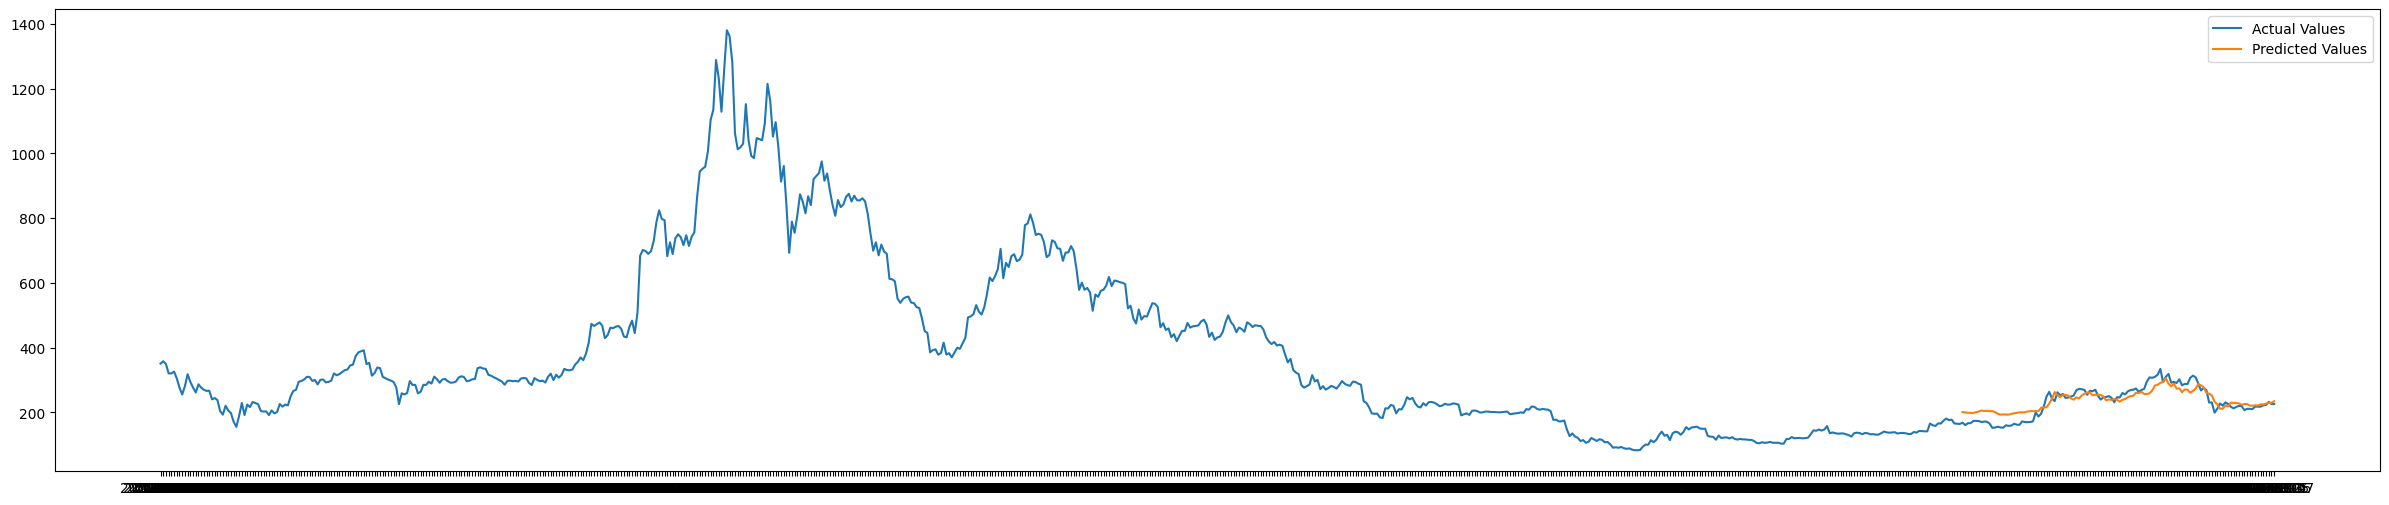

In [34]:
plt.figure(figsize=(30, 6))
plt.plot(data1)
plt.plot(preds1_Tao)
plt.legend(["Actual Values", "Predicted Values"])
plt.show()

### Errors

In [35]:
mse_Tao = np.mean((np.array(preds1_Tao[0]) - np.array(data1.iloc[-1*(len(preds1_Tao)):, 0]))**2)
print("mse  "+ str(mse_Tao))
print("rmse "+ str(np.sqrt(mse_Tao)))

mse  571.6112568268184
rmse 23.90839302058627


In [36]:
(np.array(test_y) - np.array(preds_Tao))[:, 0]

array([-2.81928022e-02, -2.45876222e-02, -2.93391528e-02, -2.44228881e-02,
       -2.43753737e-02, -2.06561138e-02, -2.23300340e-02, -2.49208323e-02,
       -2.63632574e-02, -2.54713777e-02, -2.51005081e-02, -2.97896456e-02,
       -3.76872891e-02, -3.29423107e-02, -2.86220381e-02, -3.11272652e-02,
       -3.12989733e-02, -2.55972989e-02, -2.82197644e-02, -2.92731933e-02,
       -2.58874526e-02, -2.92749489e-02, -2.95003803e-02, -2.17078393e-02,
       -2.51121892e-02, -2.61543407e-02, -2.59431322e-02, -2.42711691e-02,
       -3.01167446e-03, -2.08457866e-02, -1.47036540e-02,  1.82490838e-03,
        1.67705566e-02,  1.65066341e-02, -1.55577543e-02, -1.46328212e-02,
        1.19643751e-02, -1.64702827e-03,  2.20627701e-03, -5.36459967e-03,
        1.74786318e-03,  7.62692503e-03,  4.13084974e-03,  1.96582275e-02,
        1.58181485e-02,  1.05679524e-02,  6.68994641e-03, -5.60343107e-03,
        1.07000959e-02,  8.46436032e-03,  1.22649076e-02, -1.81107946e-03,
       -7.31184748e-03,  

In [37]:
err_test_Tao = (np.array(test_y) - np.array(preds_Tao))[:, 0]
mse_test_Tao = np.mean(err_test_Tao ** 2)
rmse_test_Tao = np.sqrt(mse_test_Tao)
mae_test_Tao = np.mean(np.abs(err_test_Tao))
mape_test_Tao = np.mean(np.abs(err_test_Tao) / np.array(test_y)[:, 0])
ETAON = pd.DataFrame([[mse_test_Tao, rmse_test_Tao, mae_test_Tao, mape_test_Tao]], columns = ["mse", "rmse", "mae", "mape"], index = ['TAON'])
ETAON

,mse,rmse,mae,mape
TAON,0.000317,0.017798,0.014815,0.164998


## HHO (Harris Hawk Optimisation)

### Implementing the model

In [38]:
class HHO_ELM():
  def __init__(self, p_size):
    self.p_size = p_size
    self.no_hidden_nodes = 5
    self.weight = np.random.uniform(-1, 1, (self.p_size, 9, self.no_hidden_nodes))
    self.bias = np.random.uniform(-1, 1, (self.p_size, self.no_hidden_nodes))
    self.beta = np.random.uniform(-1, 1, (self.p_size, self.no_hidden_nodes, 1))
    self.train_px = np.tile(np.expand_dims(train_x, axis = 0), (p_size, 1, 1))
    self.train_py = np.tile(np.expand_dims(train_y, axis = 0), (p_size, 1, 1))
    self.fitness = np.zeros([self.p_size, 1]) + -1 * np.Inf
    self.forward_propagation(self.beta)
    self.best_error_graph = np.array([-1 * np.max(self.fitness)])

  def sigmoid(self, x):
    return 1 / (1 + np.exp(-1 * x))

  def forward_function(self, weight, bias, beta, X):
    a = np.matmul(X, weight)
    c = np.expand_dims(bias, axis = len(bias.shape) - 1)
    b = a + c
    return self.sigmoid(np.matmul(b, beta))

  def forward_propagation(self, new_beta):
    preds = self.forward_function(self.weight, self.bias, new_beta, self.train_px)
    error = (preds - self.train_py) ** 2
    new_fitness = -np.mean(error, axis = 1)
    cond = new_fitness > self.fitness
    self.beta = np.where(np.expand_dims(cond, axis = 1), new_beta, self.beta)
    self.fitness = np.where(cond, new_fitness, self.fitness)

    sorted_indices = np.argsort(self.fitness[:, 0])
    self.weight = self.weight[sorted_indices]
    self.bias = self.bias[sorted_indices]
    self.beta = self.beta[sorted_indices]
    self.fitness = self.fitness[sorted_indices]

  def optimise(self, gen):
    for i in range(gen):
      half_size = int(np.floor(self.p_size / 2))

      r1 = np.random.uniform(size = (self.p_size, self.no_hidden_nodes, 1))
      r2 = np.random.uniform(size = (self.p_size, self.no_hidden_nodes, 1))
      A1 = 2 * r1 - 1
      C1 = 2 * r2

      C2 = self.beta.copy()
      C2[half_size:] = self.beta[0].copy()

      A2 = self.beta.copy()
      A2[:half_size] = self.beta[half_size].copy()

      new_beta = self.beta + np.abs(C1 * C2 - A1 * A2)
      new_beta[new_beta < -1] = -1
      new_beta[new_beta > 1] = 1
      self.forward_propagation(new_beta)
      # print(self.fitness[:, 0])

      self.best_error_graph = np.append(self.best_error_graph, np.array([-1 * np.max(self.fitness)]))


### Convergence Curve

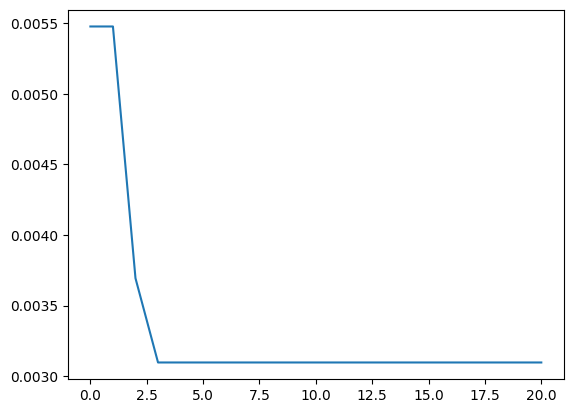

In [39]:
optimiser = HHO_ELM(2000)
optimiser.optimise(20)
ec_HHO = optimiser.best_error_graph
plt.plot(ec_HHO)
preds_train_HHO = optimiser.forward_function(optimiser.weight[-1], optimiser.bias[-1], optimiser.beta[-1],  train_x)



In [40]:
print(preds_train_HHO.shape)
# print(np.array(train_y)[:, 0])
# print(np.array(preds_train)[:, 0])
error_train_HHO = (np.array(train_y)[:, 0] - np.array(preds_train_HHO)[:, 0])
# print(error_train)
print(np.mean((error_train_HHO) ** 2))

(655, 1)
0.003097034478322149


### Prediction

In [41]:
preds_HHO = optimiser.forward_function(optimiser.weight[-1], optimiser.bias[-1], optimiser.beta[-1], test_x)
print(preds_HHO.shape)
error_test_HHO = (np.array(test_y)[:, 0] - np.array(preds_HHO)[:, 0])
print(np.mean(error_test_HHO ** 2))

(116, 1)
0.000483169237139923


In [42]:
np.array(preds_HHO)[:, 0]

array([0.09852578, 0.09818456, 0.09873905, 0.096206  , 0.09677923,
       0.09607406, 0.09699816, 0.09598411, 0.09760092, 0.09670855,
       0.09843472, 0.0979507 , 0.09811108, 0.09664553, 0.09644331,
       0.09596019, 0.09485037, 0.09280919, 0.09346224, 0.0931792 ,
       0.09284653, 0.09337414, 0.09445641, 0.09379915, 0.09515505,
       0.09608992, 0.09553468, 0.09626153, 0.09778601, 0.09842158,
       0.10006864, 0.09984821, 0.10262117, 0.10974544, 0.10921702,
       0.11442506, 0.11624747, 0.12402911, 0.12732514, 0.12442586,
       0.12573414, 0.12883944, 0.12568162, 0.12942201, 0.12629389,
       0.12971071, 0.12925169, 0.13065784, 0.13318058, 0.13312639,
       0.13476254, 0.13423599, 0.13085851, 0.13225574, 0.12953541,
       0.13177877, 0.12675904, 0.12621823, 0.12525565, 0.12458813,
       0.12628749, 0.12509759, 0.12421672, 0.12790573, 0.12707312,
       0.13194173, 0.13032231, 0.13405275, 0.13342169, 0.13525147,
       0.13744537, 0.1377686 , 0.1410797 , 0.14155115, 0.14864

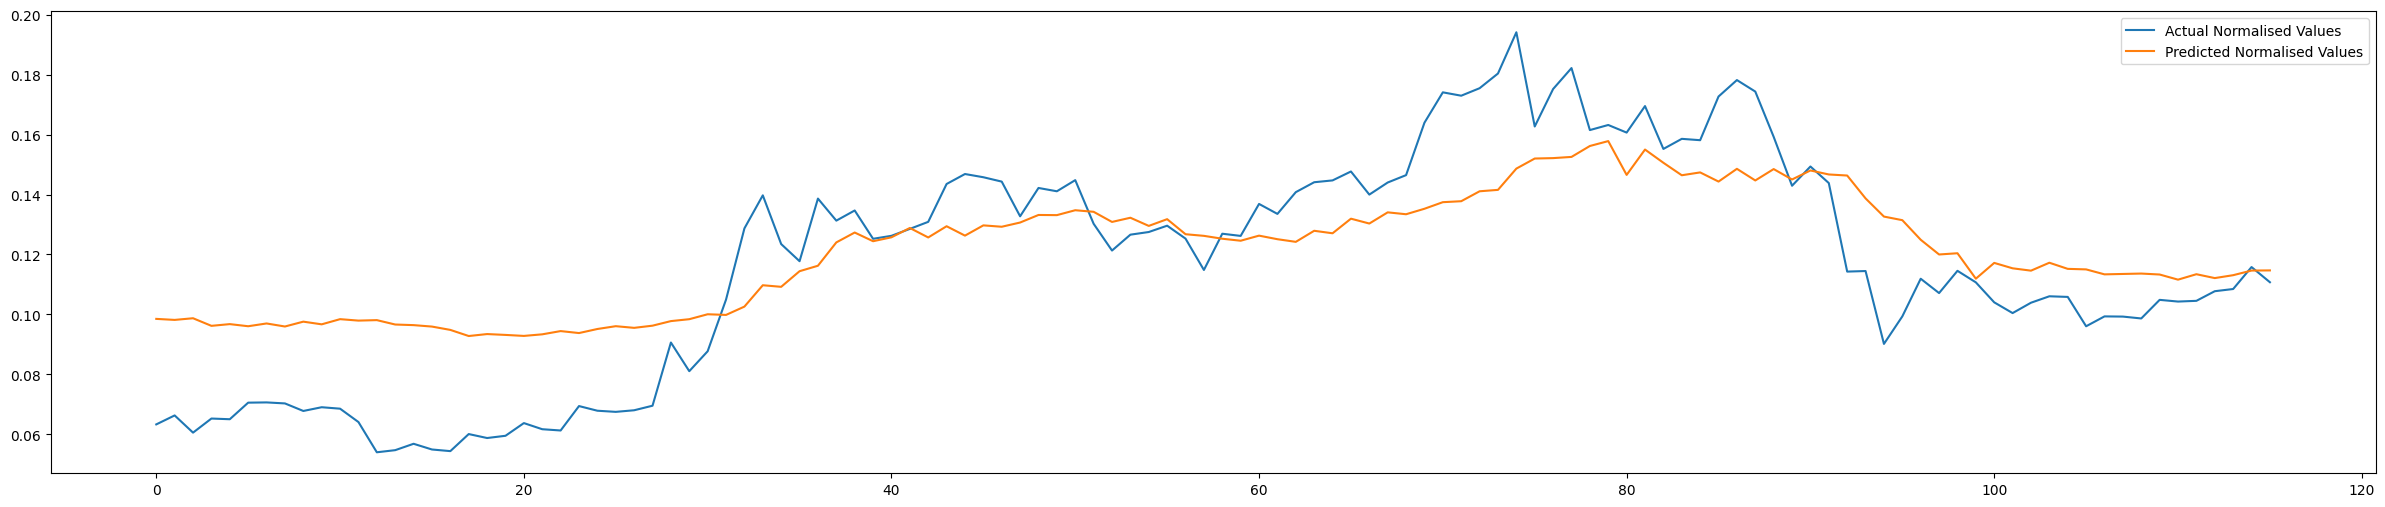

In [43]:
plt.figure(figsize=(30, 6))
plt.plot(test_y.reset_index()[9])
plt.plot(np.array(preds_HHO)[:, 0])
plt.legend(["Actual Normalised Values", "Predicted Normalised Values"])
plt.show()

In [44]:
denormalized_preds_HHO = denormalize(preds_HHO)
# print(denormalized_preds)
preds1_HHO = pd.DataFrame(denormalized_preds_HHO)
preds1_HHO['DATE'] = data1.index[-1*len(preds1_HHO):]
preds1_HHO = preds1_HHO.set_index('DATE')
print(preds1_HHO)

                     0
DATE                  
2019-04-14  209.846148
2019-04-15  209.402802
2019-04-16  210.123249
2019-04-17  206.832030
2019-04-18  207.576832
...                ...
2019-08-03  229.202420
2019-08-04  227.524764
2019-08-05  228.779922
2019-08-06  230.785902
2019-08-07  230.851313

[116 rows x 1 columns]


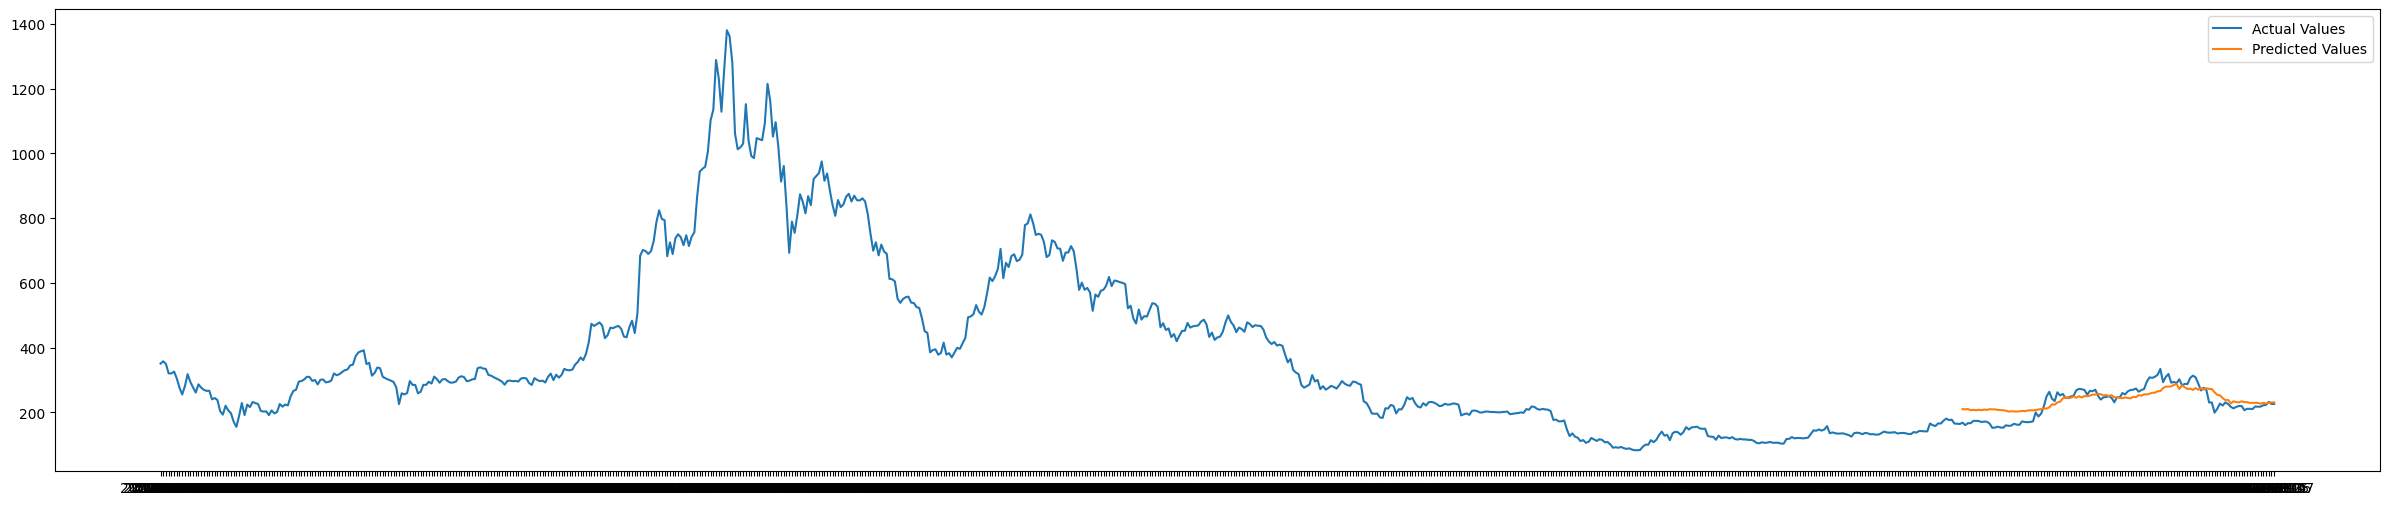

In [45]:
plt.figure(figsize=(30, 6))
plt.plot(data1)
plt.plot(preds1_HHO)
plt.legend(["Actual Values", "Predicted Values"])
plt.show()

### Errors

In [46]:
mse_HHO = np.mean((np.array(preds1_HHO[0]) - np.array(data1.iloc[-1*(len(preds1_HHO)):, 0]))**2)
print("mse  "+ str(mse_HHO))
print("rmse "+ str(np.sqrt(mse_HHO)))

mse  868.6141271062431
rmse 29.472260298562837


In [47]:
(np.array(test_y) - np.array(preds_HHO))[:, 0]

array([-0.03518586, -0.03185503, -0.03814764, -0.03091607, -0.0317188 ,
       -0.02548624, -0.02632812, -0.02565073, -0.02978406, -0.02764503,
       -0.02985453, -0.03383079, -0.04407081, -0.04190071, -0.03956982,
       -0.04099147, -0.0404255 , -0.03269417, -0.03466764, -0.03363901,
       -0.02907039, -0.03164383, -0.03315069, -0.02434835, -0.02725775,
       -0.02857079, -0.0274833 , -0.02669281, -0.00714103, -0.01733734,
       -0.01233389,  0.00511839,  0.02608613,  0.02998232,  0.01425857,
        0.00333789,  0.02239785,  0.00726108,  0.00735203,  0.00080967,
        0.00049412, -0.00030314,  0.00520146,  0.01408765,  0.02054212,
        0.01605333,  0.01505336,  0.00207679,  0.00900497,  0.00795567,
        0.01003449, -0.00399225, -0.00954311, -0.0056448 , -0.0020385 ,
       -0.00217525, -0.00146505, -0.01138121,  0.00166986,  0.00160976,
        0.01057427,  0.00843908,  0.01657541,  0.01619104,  0.01763269,
        0.01573917,  0.0096531 ,  0.0099514 ,  0.0130458 ,  0.02

In [48]:
err_test_HHO = (np.array(test_y) - np.array(preds_HHO))[:, 0]
mse_test_HHO = np.mean(err_test_HHO ** 2)
rmse_test_HHO = np.sqrt(mse_test_HHO)
mae_test_HHO = np.mean(np.abs(err_test_HHO))
mape_test_HHO = np.mean(np.abs(err_test_HHO) / np.array(test_y)[:, 0])
EHHON = pd.DataFrame([[mse_test_HHO, rmse_test_HHO, mae_test_HHO, mape_test_HHO]], columns = ["mse", "rmse", "mae", "mape"], index = ['HHO'])
EHHON

,mse,rmse,mae,mape
HHO,0.000483,0.021981,0.018035,0.201803


## Comparison Of All

### Convergence Curve

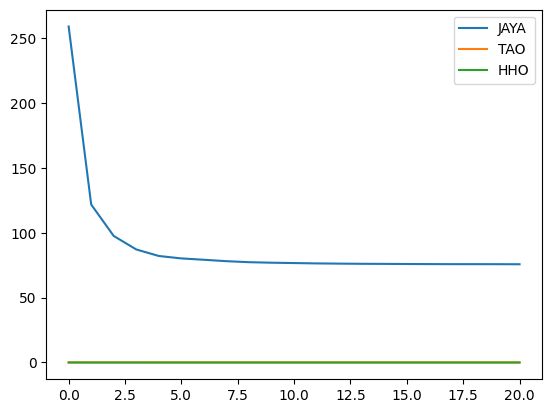

In [64]:
plt.figure()
plt.plot(ec_Jaya)
plt.plot(ec_Tao)
plt.plot(ec_HHO)
plt.legend(["JAYA", "TAO", "HHO"])
plt.show()


### Prediction

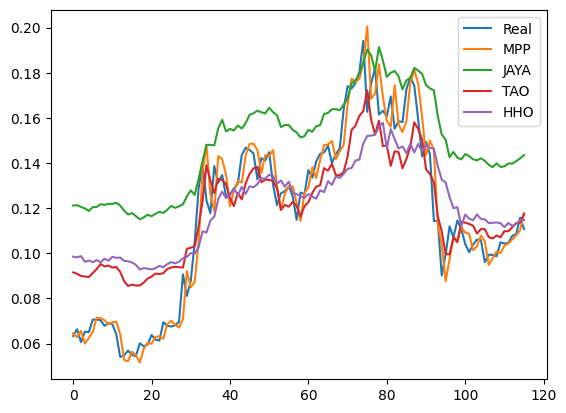

In [65]:
plt.figure()
plt.plot(np.array(test_y[9]))
plt.plot(pred_y_MPP)
plt.plot(np.array(preds_Jaya))
plt.plot(np.array(preds_Tao))
plt.plot(np.array(preds_HHO))
plt.legend(["Real", "MPP", "JAYA", "TAO", "HHO"])
plt.show()

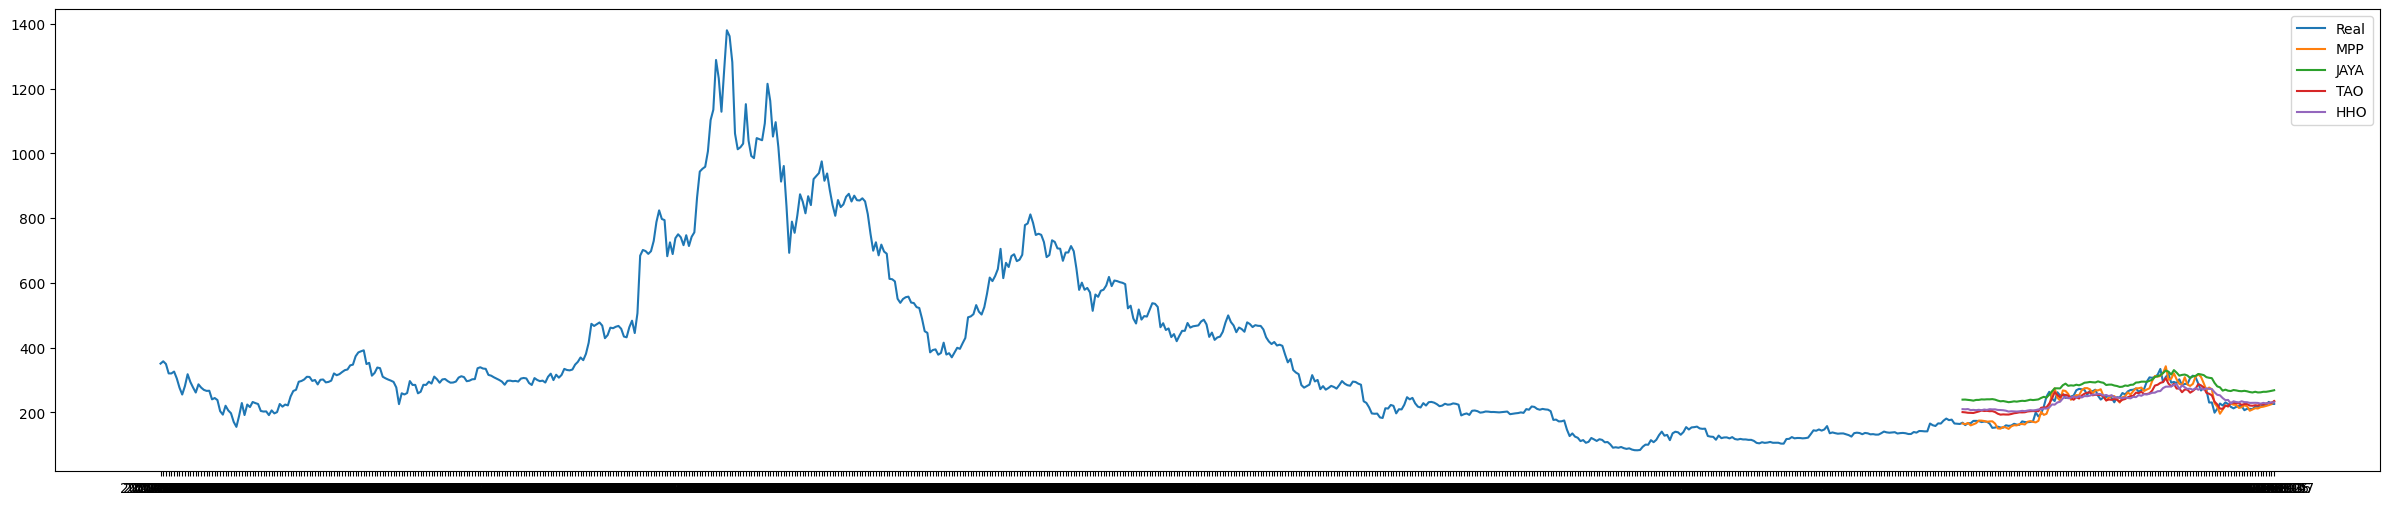

In [66]:
plt.figure(figsize=(30, 6))
plt.plot(data1)
plt.plot(preds1_MPP)
plt.plot(preds1_Jaya)
plt.plot(preds1_Tao)
plt.plot(preds1_HHO)
plt.legend(["Real", "MPP", "JAYA", "TAO", "HHO"])
plt.show()

### Errors

In [67]:
EN = pd.concat([MPPN, EJYN, ETAON, EHHON])
EN

,mse,rmse,mae,mape
MPPN,0.000090,0.009507,0.006656,0.057398
Jaya,0.001361,0.036886,0.032416,0.374766
TAON,0.000317,0.017798,0.014815,0.164998
HHO,0.000483,0.021981,0.018035,0.201803
